In [2]:
import numpy as np
import pandas as pd
import datetime as datetime
from datetime import datetime
import requests
import os
import json
from dotenv import load_dotenv
import matplotlib
import matplotlib.pyplot as plt
import warnings
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

warnings.filterwarnings("ignore")
%matplotlib_inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
UsageError: Line magic function `%matplotlib_inline` not found.


In [6]:
load_dotenv()

True

In [7]:
FMP_API_KEY = os.getenv('FMP_API_KEY')

In [8]:
company = 'TSM'

In [388]:
# Pull company articles
url = f'https://financialmodelingprep.com/api/v3/stock_news?tickers={company}&limit=100&apikey={FMP_API_KEY}'
articles = requests.get(url).json()
articles = pd.DataFrame(articles)
articles['publishedDate'] = pd.to_datetime(articles['publishedDate'])
articles.head(1)

,symbol,publishedDate,title,image,site,text,url
0,TSM,2021-09-27 19:10:18,TSMC (TSM) Gains As Market Dips: What You Shou...,https://cdn.snapi.dev/images/v1/d/f/semi1-1024...,Zacks Investment Research,TSMC (TSM) closed the most recent trading day ...,https://www.zacks.com/stock/news/1801535/tsmc-...


In [389]:
# Preview articles
articles['text'][:10]

0    TSMC (TSM) closed the most recent trading day ...
1    Taiwan's TSMC said on Friday it is actively su...
2    It's rare for a stock to be able to achieve av...
3    Samsung Electronics Co Ltd (OTC: SSNLF) won a ...
4    TSMC (TSM) closed at $114.96 in the latest tra...
5    Since our previous analysis, we analyzed the p...
6    Donaldson: One Of The Best Dividend Aristocrat...
7    These three stocks already have established a ...
8     VT: A Gold Standard ETF That Gives You The World
9    HSINCHU, Taiwan--(BUSINESS WIRE)--TSMC Commits...
Name: text, dtype: object

In [390]:
# Calculate sentoment scores for articles
scores = []
text = articles['text']

for txt in text:

    vs = analyzer.polarity_scores(txt)
    scores.append(vs)

text_df = pd.DataFrame(text, columns=['text'])
scores_df = pd.DataFrame(scores)
sentiment_df = pd.concat([text_df, scores_df], axis=1)

combined_df = pd.concat([sentiment_df,articles],axis=1)
combined_df = combined_df.T.drop_duplicates().T.set_index('publishedDate')
combined_df.head(1)


,text,neg,neu,pos,compound,symbol,title,image,site,url
publishedDate,,,,,,,,,,
2021-09-27 19:10:18,TSMC (TSM) closed the most recent trading day ...,0,1,0,0,TSM,TSMC (TSM) Gains As Market Dips: What You Shou...,https://cdn.snapi.dev/images/v1/d/f/semi1-1024...,Zacks Investment Research,https://www.zacks.com/stock/news/1801535/tsmc-...


            neg      neu      pos  compound
symbol                                     
TSM     0.03037  0.86156  0.10805  0.222318


<AxesSubplot:title={'center':'TSM Sentiment Analysis'}, xlabel='symbol', ylabel='sentiment'>

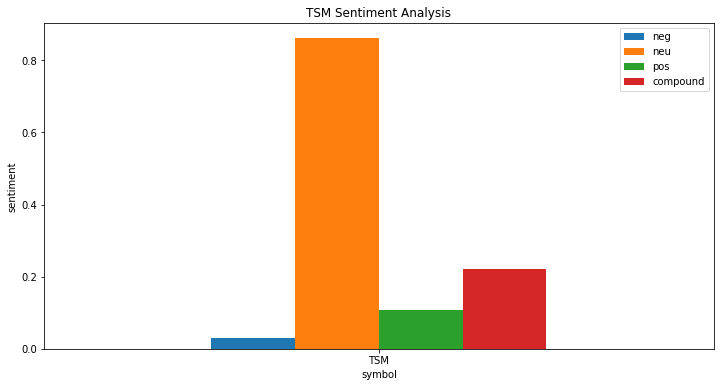

In [392]:
# Plot mean sentiment
scores_df['symbol'] = company
scores_df
scores_mean = scores_df.groupby('symbol').mean()
print(scores_mean)
scores_mean.plot.bar(figsize=(12,6),title=f'{company} Sentiment Analysis',ylabel='sentiment', rot=0)